<a href="https://colab.research.google.com/github/kdChen07/Financial_Engineering/blob/main/mc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
from google.colab import files

In [3]:
N1=1000000
N2=100
S=30
a=np.ones(N1)
S0=S*a
Y0=0.015
Y=Y0*a
XY=0.01
sigma_Y=0.05
aY=2
r0=0.05
r=r0*a
Xr=0.05
sigma_r=0.05
T=365/365
t_delta=T/N2
mu=0.1
r=0.1
sigma=0.3
K=30

In [4]:
Z1=0*a
Z2=0*a
Z1=np.zeros((N1,N2))
Z2=np.zeros((N1,N2))

In [5]:
Y=np.zeros((N1,N2))
Y[:,0]=Y0
Y

array([[0.015, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.015, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.015, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.015, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.015, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.015, 0.   , 0.   , ..., 0.   , 0.   , 0.   ]])

In [6]:
for i in range(0,N1):
  Epsilon = np.random.normal(0, 1, N2)
  Z1[i,:]=Epsilon
  for t in range(1,N2):
    Y[i,t]=Y[i,t-1]+aY*(XY-max(Y[i,t-1],0))*t_delta+sigma_Y*math.sqrt(max(Y[i,t-1],0))*math.sqrt(t_delta)*Epsilon[t]

In [7]:
r0=0.05
r=r0*a
Xr=0.05
sigma_r=0.05
ar=2

In [8]:
r=np.zeros((N1,N2))
r[:,0]=r0
r

array([[0.05, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.05, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.05, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.05, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.05, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.05, 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [9]:
for i in range(0,N1):
  Epsilon2 = np.random.normal(0, 1, N2)
  Z2[i,:]=Epsilon2
  for t in range(1,N2):
    r[i,t]=r[i,t-1]+ar*(Xr-max(r[i,t-1],0))*t_delta+sigma_r*math.sqrt(max(r[i,t-1],0))*math.sqrt(t_delta)*Epsilon2[t]

In [10]:
x = np.arange(0,N2,1)
y = Y

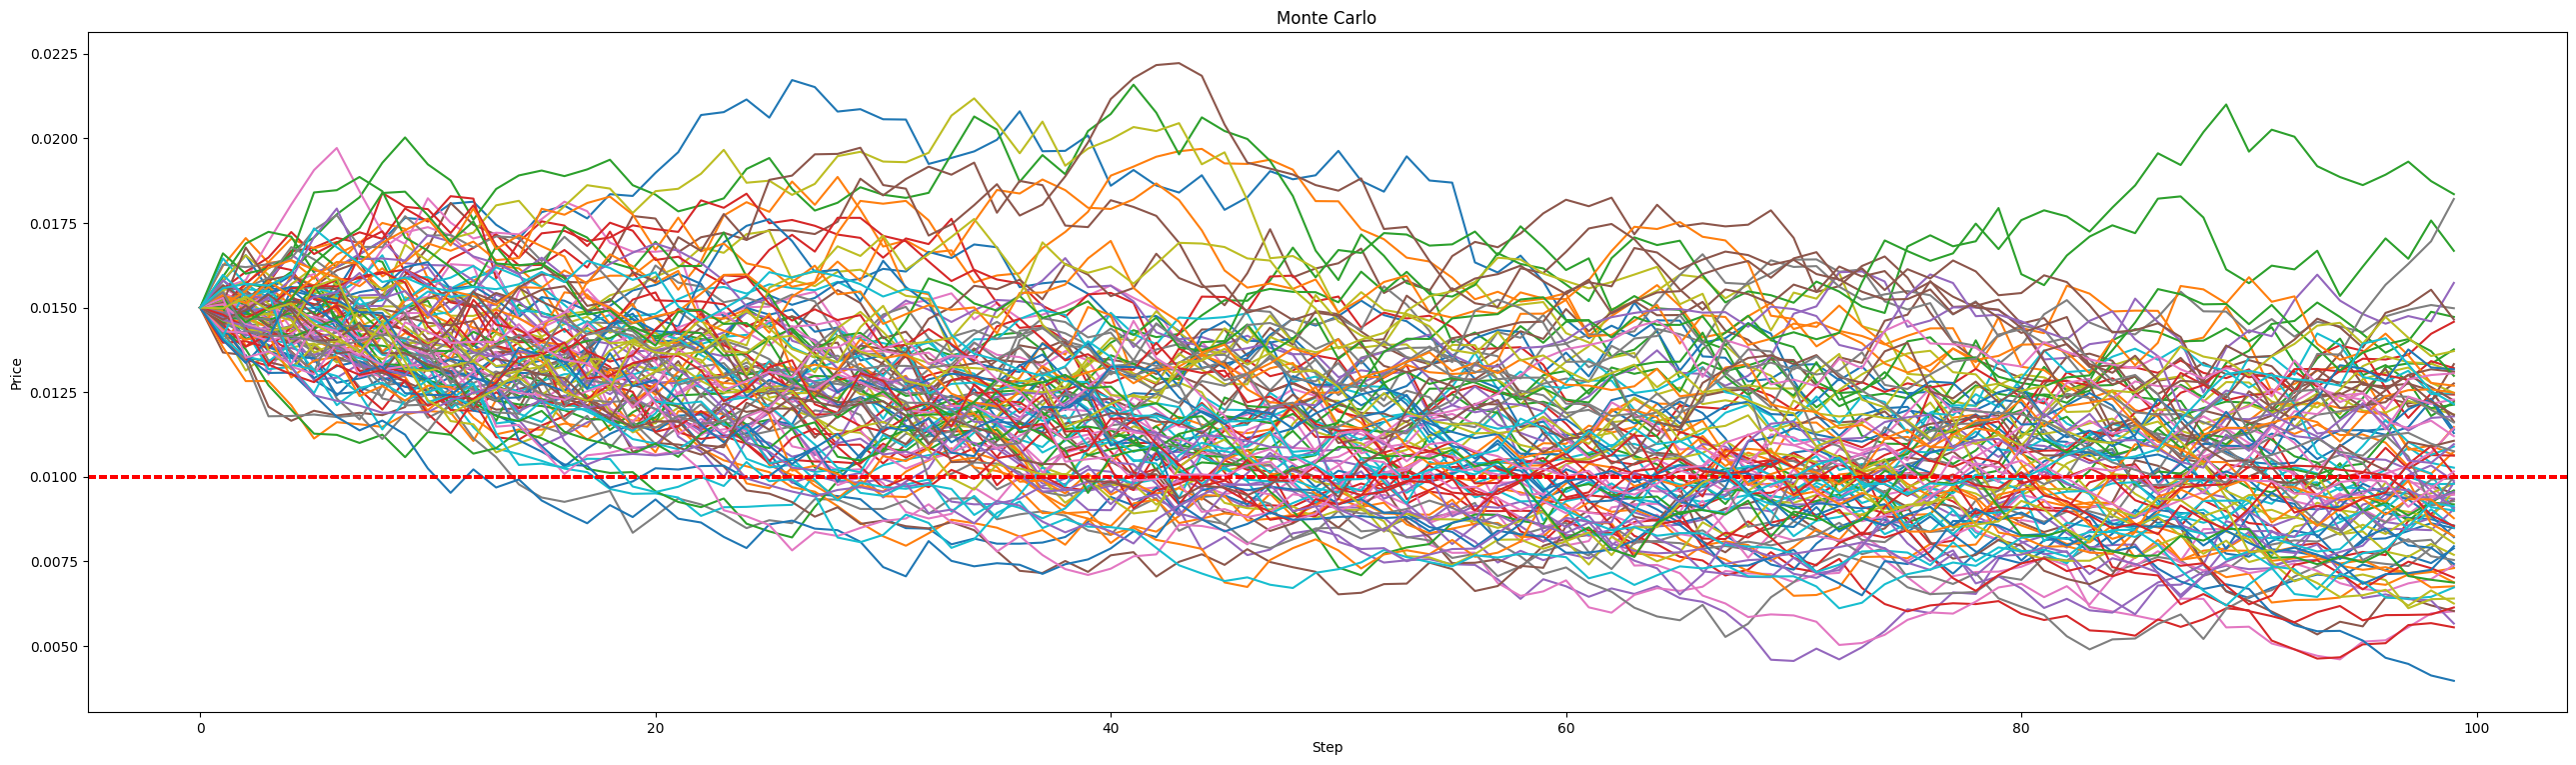

In [28]:
plt.subplots(figsize=(32,9),dpi=100)
for i in range(0,N2):
  plt.plot(x, y[i,:])
  plt.title('Monte Carlo')
  plt.xlabel('Step')
  plt.ylabel('Price')
  plt.axhline(0.01, color='r', ls='dashed', lw=1.5,
            label='均值')

In [12]:
c = np.arange(0,N2,1)
d = r

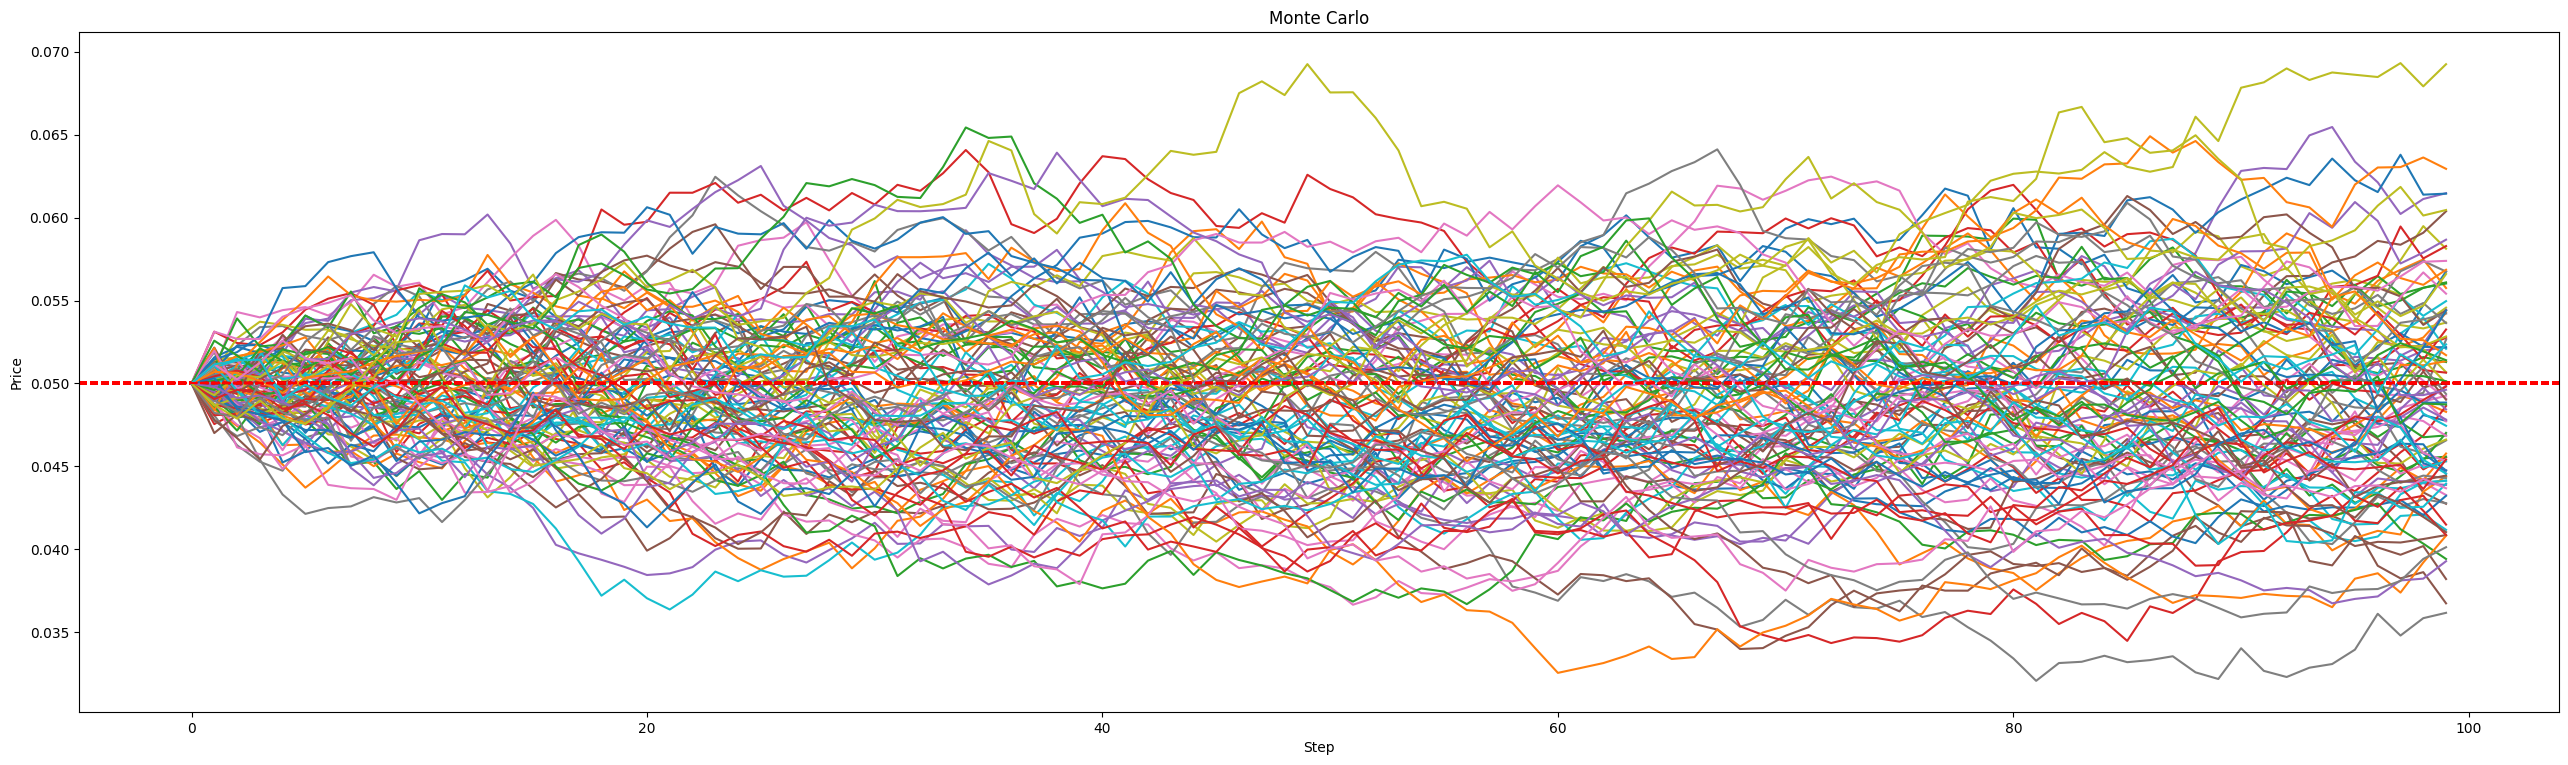

In [27]:
plt.subplots(figsize=(32,9),dpi=100)
for i in range(0,N2):
  plt.plot(c, d[i,:])
  plt.title('Monte Carlo')
  plt.xlabel('Step')
  plt.ylabel('Price')
  plt.axhline(0.05, color='r', ls='dashed', lw=1.5,
            label='均值')

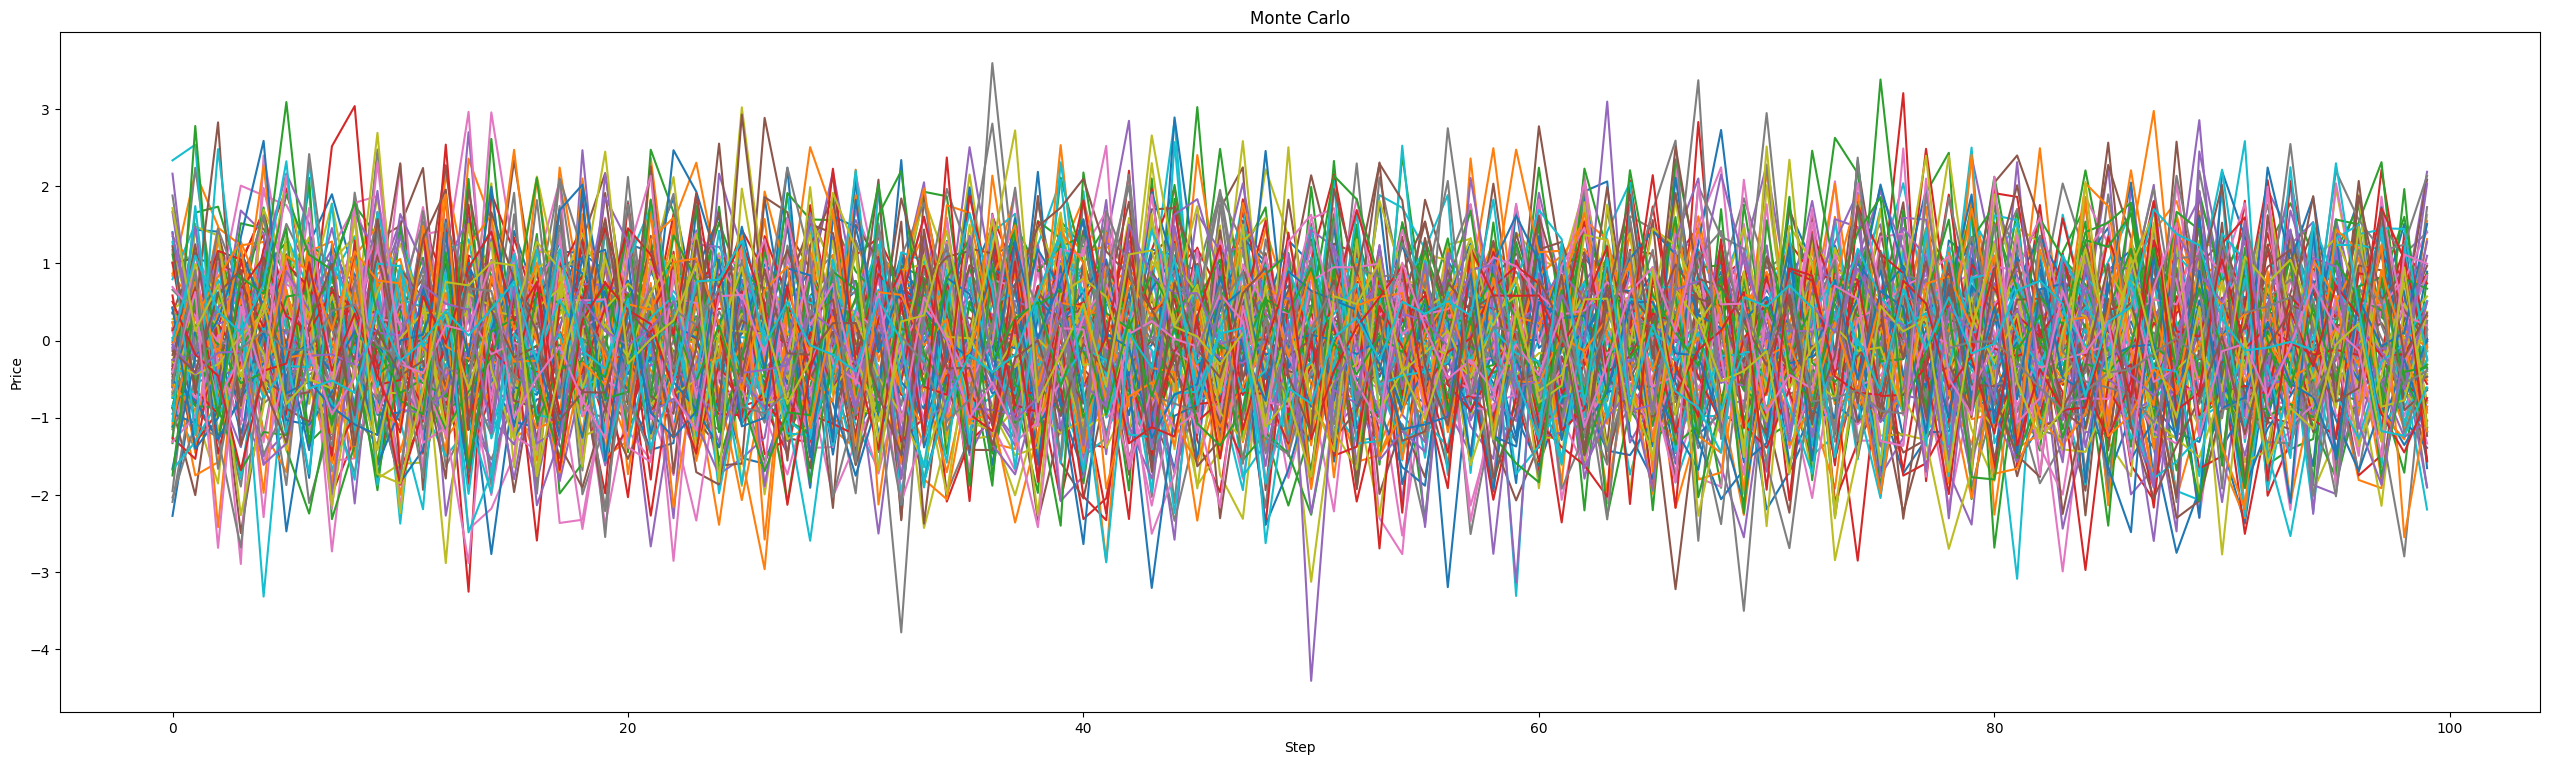

In [26]:
plt.subplots(figsize=(32,9),dpi=100)
for i in range(0,N2):
  plt.plot(c, Z1[i,:])
  plt.title('Monte Carlo')
  plt.xlabel('Step')
  plt.ylabel('Price')

In [15]:
s=np.zeros((N1,N2))
s[:,0]=30
s

array([[30.,  0.,  0., ...,  0.,  0.,  0.],
       [30.,  0.,  0., ...,  0.,  0.,  0.],
       [30.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [30.,  0.,  0., ...,  0.,  0.,  0.],
       [30.,  0.,  0., ...,  0.,  0.,  0.],
       [30.,  0.,  0., ...,  0.,  0.,  0.]])

In [16]:
for i in range(0,N1):
  Epsilon3 = np.random.normal(0, 1, N2)
  # Z3[i,:]=Epsilon3
  for t in range(1,N2):
    s[i,t]=s[i,t-1]+s[i,t-1]*(r[i,t-1]*t_delta+math.sqrt(Y[i,t-1])*math.sqrt(t_delta)*Epsilon3[t])

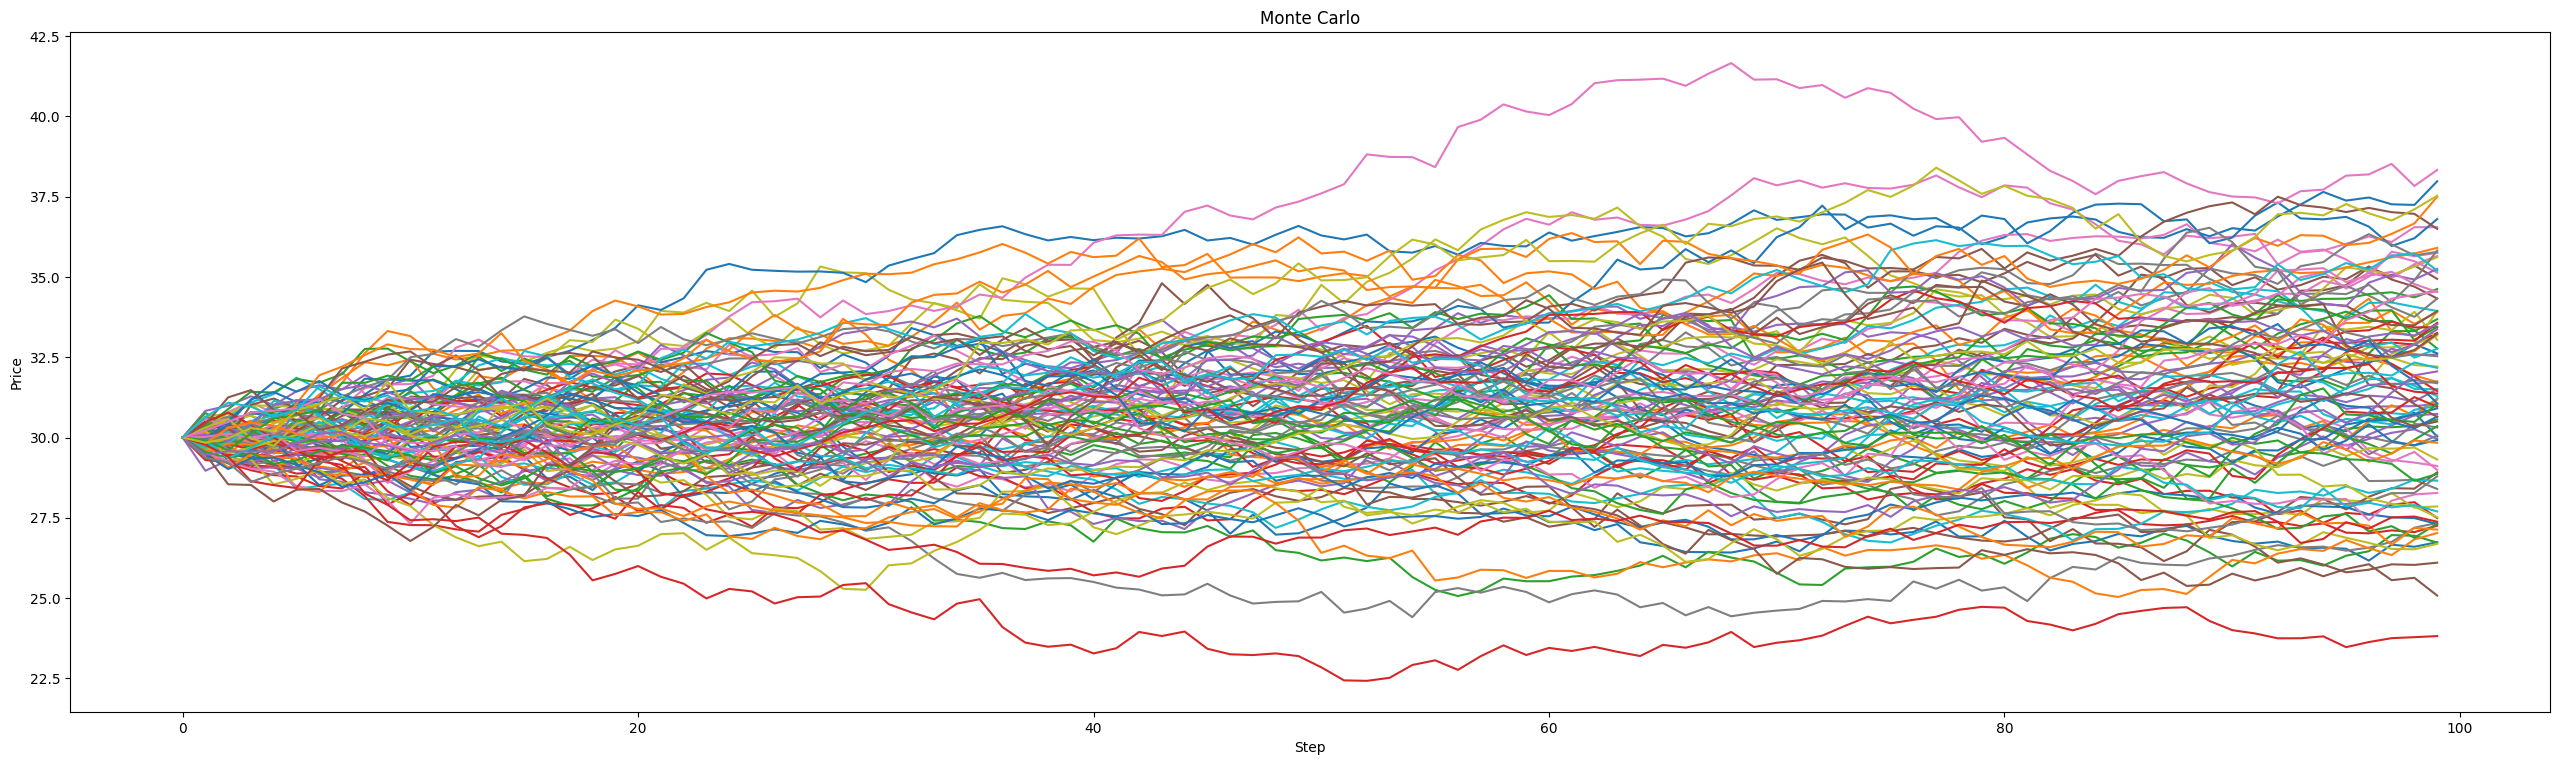

In [17]:
plt.subplots(figsize=(32,9),dpi=100)
for i in range(0,N2):
  plt.plot(c, s[i,:])
  plt.title('Monte Carlo')
  plt.xlabel('Step')
  plt.ylabel('Price')

In [18]:
sum=0
for i in range(0,N1):
  sum=sum+max(s[i,N2-1]-K,0)

In [19]:
sum

2238227.8849179973

In [23]:
R=np.zeros(N2)
for i in range(0,N2):
  for j in range(0,N1):
    R[i]=R[i]+r[j,i]
R=R/N1
R

array([0.05      , 0.05000054, 0.05000096, 0.05000323, 0.05000433,
       0.0500031 , 0.05000234, 0.05000139, 0.05000132, 0.0500013 ,
       0.05000176, 0.05000247, 0.05000194, 0.05000057, 0.05000031,
       0.04999922, 0.04999894, 0.04999783, 0.04999516, 0.04999586,
       0.04999483, 0.04999498, 0.04999573, 0.049995  , 0.04999583,
       0.04999782, 0.04999575, 0.04999688, 0.04999661, 0.04999673,
       0.0499969 , 0.04999547, 0.04999567, 0.04999545, 0.04999631,
       0.04999628, 0.04999652, 0.04999798, 0.04999921, 0.05000133,
       0.05000058, 0.05000109, 0.05000309, 0.0500031 , 0.05000345,
       0.05000423, 0.05000478, 0.05000408, 0.05000257, 0.05000109,
       0.05000395, 0.05000477, 0.05000611, 0.05000455, 0.05000467,
       0.05000647, 0.05000522, 0.05000368, 0.05000243, 0.05000164,
       0.05000165, 0.05000186, 0.05000029, 0.05000076, 0.05000011,
       0.04999944, 0.04999886, 0.05000031, 0.05000097, 0.05000114,
       0.05000174, 0.05000459, 0.05000285, 0.0500034 , 0.05000

In [24]:
mc=sum/N1
for i in range(0,N2):
  mc=mc*math.exp(-R[i]*1/N2)

In [25]:
mc

2.1290659813657893